# Heart Disease - Exploratory Data Analysis
**What is Heart Disease?**  
[Heart disease (or Cardiovascular disease)](https://www.who.int/health-topics/cardiovascular-diseases/#tab=tab_1) is a general term for body conditions affecting the heart or blood vessels. It is one of top 10 global causes of deaths in the world and an estimated 17.9 million people died from cardiovascular disease each year, representing 31% of all global deaths.

**About the dataset**  
We will use dataset from Kaggle, [Heart Disease UCI](https://www.kaggle.com/ronitf/heart-disease-uci). This dataset contains 13 attributes related to heart disease such as chest pain types, blood pressure and cholesterol from 303 patients. We will try to explore this dataset to find insights for heart disease. We will explore statistics and relationships with heart disease in this dataset using data visualization.

**Building Models**  
We will also classify heart disease with multiple models such as ***Logistic Regression, Random Forest, Support Vector Machine, XGBoost Classifier*** after EDA.  


Please check my classification work as well.  
**Heart Disease Classification**: https://www.kaggle.com/microvision/heart-disease-classification

### Table of Contents
1. [Import Libraries](#1.-Import-Libraries)  
2. [Load Dataset](#2.-Load-Dataset)  
3. [Data Preparation](#3.-Data-Preparation)  
  3-1. [Data Description](#3-1.-Data-Description)  
  3-2. [Rename Columns](#3-2.-Rename-Columns)  
  3-3. [Check out Missing Values](#3-3.-Check-out-Missing-Values)  
    
4. [Exploratory Data Analysis (EDA)](#4.-Exploratory-Data-Analysis-(EDA))  
  4-1. [Target Variable - Condition](#4-1.-Target-Variable---Condition)  
  4-2. [Feature Variable - Sex](#4-2.-Feature-Variable---Sex)  
  4-3. [Risk Factors for Developing Heart Disease](#4-3.-Risk-Factors-for-Developing-Heart-Disease)  
  4-4. [Symptoms of Heart Disease](#4-4.-Symptoms-of-Heart-Disease)  
  4-5. [Heart Functions for Heart Disease](#4-5.-Heart-Functions-for-Heart-Disease)  
  4-6. [Feature Variable - Age](#4-6.-Feature-Variable---Age)  
  4-7. [Age vs. Multiple Features for Condition](#4-7.-Age-vs.-Multiple-Features-for-Condition)  
  4-8. [Feature vs. Feature for Condition](#4-8.-Feature-vs.-Feature-for-Condition)  
  4-9. [Correlations](#4-9.-Correlations)  

## 1. Import Libraries

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import plotly.graph_objs as go
import plotly.offline as py

## 2. Load Dataset

In [2]:
# Import the dataset as CSV file
df = pd.read_csv('../input/heart-disease-uci/heart.csv')

## 3. Data Preparation

### 3-1. Data Description

In [3]:
# Preview the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


The features following are used for the prediction of heart disease presence:
1. **<font color="Black">age</font>**: age in years
2. **<font color="Black">sex</font>**:
      * 0 = Female
      * 1 = Male
3. **<font color="Black">cp</font>**: Chest pain types
      * 0 = Typical angina
      * 1 = Atypical angina
      * 2 = Non-angina pain
      * 3 = Asymptomatic
4. **<font color="Black">trestbps</font>**: Resting blood pressure (mmHg)
      * High blood pressure = 140 mmHg or above
5. **<font color="Black">chol</font>**: Serum cholestoral (mg/dL)
      * Certain elements in the blood, including low-density lipoprotein (LDL), 
           high-density lipoprotein (HDL) and triglycerides
      * Calculation = HDL + LDL + 0.2 * triglycerides
      * Higher than 200 mg/dL is concerned
6. **<font color="Black">fbs</font>**: Fasting blood sugar (> 120 mg/dL)
     * 0 = False
     * 1 = True
     * Higher than 126 mg/dL points to diabetes
7. **<font color="Black">restecg</font>**: Resting electrocardiographic results 
     * 0 = Normal
     * 1 = Abnormal ST-T wave
     * 2 = Showing probable or definite left ventricular hypertrophy
8. **<font color="Black">thalach</font>**: Maximum heart rate achieved (bpm) 
9. **<font color="Black">exang</font>**: Exercise induced angina
     * 0 = Negative 
     * 1 = Positive
10. **<font color="Black">oldpeak</font>**: ST depression induced by exercise relative to rest 
11. **<font color="Black">slope</font>**: The slope of the peak exercise ST segment
    * 0 = Upsloping
    * 1 = Horizontal 
    * 2 = Downsloping
12. **<font color="Black">ca</font>**: Number of major vessels (0-3) colored by fluoroscopy  
    * The colored blood vessels are passing through
    * There is a clot if the blood vessel is not colored
13. **<font color="Black">thal</font>**: Thallium scintigraphy
    * 3 = Normal
    * 6 = Fixed defect
    * 7 = Reversable defect
14. **<font color="Black">target</font>**: Heart Disease  
    * 0 = Benign 
    * 1 = Malignant

### 3-2. Rename Columns

Some of the original column names are a little bit difficult to identify what the column data is about. We will try to rename those columns to make them easily understand.

In [4]:
# Rename origical columns
df.columns = ['Age', 'Sex', 'Chest_pain_type', 'Resting_bp', 
              'Cholesterol', 'Fasting_bs', 'Resting_ecg', 
              'Max_heart_rate', 'Exercise_induced_angina', 
              'ST_depression', 'ST_slope', 'Num_major_vessels',
              'Thallium_test', 'Condition']

The **renamed** features following:  
1. **<font color="Black">age</font>** -> **<font color="MediumBlue">Age</font>**  
2. **<font color="Black">sex</font>** -> **<font color="MediumBlue">Sex</font>**  
3. **<font color="Black">cp</font>** -> **<font color="MediumBlue">Chest_pain_type</font>**  
4. **<font color="Black">trestbps</font>** -> **<font color="MediumBlue">Resting_bp</font>**  
5. **<font color="Black">chol</font>** -> **<font color="MediumBlue">Cholesterol</font>**  
6. **<font color="Black">fbs</font>** -> **<font color="MediumBlue">Fasting_bs</font>**  
7. **<font color="Black">restecg</font>** -> **<font color="MediumBlue">Resting_ecg</font>**  
8. **<font color="Black">thalach</font>** -> **<font color="MediumBlue">Max_heart_rate</font>**  
9. **<font color="Black">exang</font>** -> **<font color="MediumBlue">Exercise_induced_angina</font>**  
10. **<font color="Black">oldpeak</font>** -> **<font color="MediumBlue">ST_depression</font>**  
11. **<font color="Black">slope</font>** -> **<font color="MediumBlue">ST_slope</font>**  
12. **<font color="Black">ca</font>** -> **<font color="MediumBlue">Num_major_vessels</font>**  
13. **<font color="Black">thal</font>** -> **<font color="MediumBlue">Thallium_test</font>**  
14. **<font color="Black">target</font>** -> **<font color="MediumBlue">Condition</font>**  

In [5]:
# Recheck the dataset
df.head()

,Age,Sex,Chest_pain_type,Resting_bp,Cholesterol,Fasting_bs,Resting_ecg,Max_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Num_major_vessels,Thallium_test,Condition
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 3-3. Check out Missing Values

In [6]:
# Check out summary of statistics of numeric columns
df.describe()

,Age,Sex,Chest_pain_type,Resting_bp,Cholesterol,Fasting_bs,Resting_ecg,Max_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Num_major_vessels,Thallium_test,Condition
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# Check out data types, missing values and more
df.info()

print()
print(f'Shape of the dataset')
print(f'Number of Features: {df.shape[1]}')
print(f'Number of Observations: {df.shape[0]}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      303 non-null    int64  
 1   Sex                      303 non-null    int64  
 2   Chest_pain_type          303 non-null    int64  
 3   Resting_bp               303 non-null    int64  
 4   Cholesterol              303 non-null    int64  
 5   Fasting_bs               303 non-null    int64  
 6   Resting_ecg              303 non-null    int64  
 7   Max_heart_rate           303 non-null    int64  
 8   Exercise_induced_angina  303 non-null    int64  
 9   ST_depression            303 non-null    float64
 10  ST_slope                 303 non-null    int64  
 11  Num_major_vessels        303 non-null    int64  
 12  Thallium_test            303 non-null    int64  
 13  Condition                303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [8]:
# Check missing values
df.isnull().sum()

Age                        0
Sex                        0
Chest_pain_type            0
Resting_bp                 0
Cholesterol                0
Fasting_bs                 0
Resting_ecg                0
Max_heart_rate             0
Exercise_induced_angina    0
ST_depression              0
ST_slope                   0
Num_major_vessels          0
Thallium_test              0
Condition                  0
dtype: int64

As we can see above, this dataset does not have any null or missing value. This time we can skip the data cleaning procedure.

## 4. Exploratory Data Analysis (EDA)

Now we explore this dataset to understand what it looks like and check out statistics by using visualization technique. 

### 4-1. Target Variable - ```Condition``` 
```Condition``` is a target variable for the heart disease predition. As it is explained on Data Description, the variable of **0** indicates **<font color="Green">Benign</font>** and **1** is **<font color="Coral">Malignant</font>**. We will look at the number and proportion of each ```Condition``` vablues by pie chart.

In [9]:
def condition_ratio(data):
    """
    Make a pie chart of 'Condition' values
    Condition: 0 = Benign, 1 = Malignant
    """
    results = data['Condition'].value_counts()
    values = [results[0], results[1]]
    labels = ['Benign', 'Malignant']
    colors = ['MediumSeaGreen', 'Coral']
    
    fig_pie = go.Pie(labels=labels, values=values,
                     marker={'colors': colors, 
                             'line': {'color': 'Black', 'width': 2}})
    py.iplot([fig_pie])
    return py
    
    
condition_ratio(df);

#### **Observations**
* Most of tumors are diagnosed with **<font color="Coral">Malignant</font>**, 54.5% (165 cases). On the other hand, the proportion of **<font color="Green">Benign</font>** in ```Condition``` is less than 50%.  

### 4-2. Feature Variable - ```Sex```

In [10]:
def sex_ratio(data):
    """
    Make a pie chart of 'Sex' values
    Sex: 0 = Female, 1 = Male
    """
    # Pie chart of sex ratio
    results = data['Sex'].value_counts()
    values = [results[0], results[1]]
    labels = ['Female', 'Male']
    colors = ['Red', 'RoyalBlue']
    
    fig_pie = go.Pie(labels=labels, values=values, 
                     marker={'colors': colors, 
                             'line': {'color': 'Black', 'width': 2}})
    py.iplot([fig_pie])
    return py

    
sex_ratio(df);

#### **Observations**
* The number of **<font color="MediumBlue">Male</font>** population are **two times** of **<font color="Red">Female</font>** population.


Let's calculate the proportion of **<font color="Coral">Malignant</font>** tumors for both **<font color="Red">Female</font>** and **<font color="MediumBlue">Male</font>**.

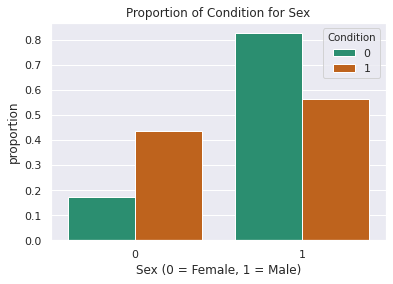

The proportion of Malignant for Sex:
Female: 43.64%
Male: 56.36%


In [11]:
def condition_proportion_sex(data):
    """
    Plot a bar chart of the proportion of Conditon vs. Sex.
    Show the percentage of Malignant for each sex.
    """
    # Bivariate analysis: Sex vs. Condition          
    data['Sex'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Sex', y='proportion', hue='Condition', palette='Dark2');
    plt.title('Proportion of Condition for Sex')
    plt.xlabel('Sex (0 = Female, 1 = Male)')
    plt.show()
    
    
    # Show the percentage of Malignant for Sex
    # female_malignant vs. Malignant
    female_malignant = data[data['Sex']==0]['Condition'].sum()/data[data['Condition']==1]['Condition'].count()
    # male_malignant vs. Malignant
    male_malignant = data[data['Sex']==1]['Condition'].sum()/data[data['Condition']==1]['Condition'].count()

    print('The proportion of Malignant for Sex:')
    print(f'Female: {female_malignant:.2%}')
    print(f'Male: {male_malignant:.2%}')

    
condition_proportion_sex(df);

### 4-3. Risk Factors for Developing Heart Disease  
[Risk factors for developing heart disease](https://www.cdc.gov/heartdisease/risk_factors.htm) include hypertension, diabetes, high cholesterol, obesity, stress, smoking etc. We will check the statistical data of ```Fasting_bs```, ```Resting_bp```, ```Cholesterol```, and ```Max_heart_rate``` as risk factors.  
  
  
#### **<font color="Coral">Risk Factors 1.</font>** ```Fasting_bs``` : Fasting blood suger (over 120 mg/dl)  
From this feature, ```Fasting_bs```, we can know whether the subjects have too much blood sugar (= blood glucose) level before meals or not. 
Normal blood sugar levels are less than 100 mg/dl after fasting for at least 8 hours. During fasting, the liver helps the level of sugar in your blood stay constant by turning fat and muscle into sugar.  
The blood sugar level which is higher than 120 mg/dl during fasting is *prediabetes* or *diabetes*. High blood sugar levels slowly lead to the dysfunction of your pancreas to release insulin and also make the blood bessels hard, called *atherosclerosis*. Thus, blood vessels can be damaged by the effects of high blood glucose levels and this can cause heart disease, kidney disease, stroke and more ([Resource](https://www.webmd.com/diabetes/how-sugar-affects-diabetes)).  

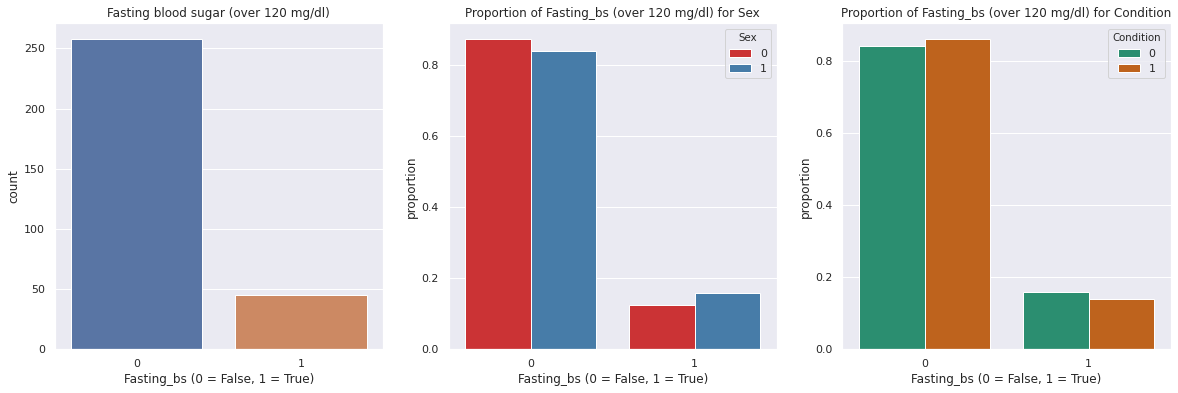

In [12]:
def risk_factors_fbs(data): 
    """
    Plot bar charts of fasting blood sugar (over 120 mg/dl) and compare for Sex and Condition
    """
    fig = plt.figure(figsize=(20, 6))
    
    # Fasting blood sugar > 120 mg/dl
    plt.subplot(1, 3, 1)
    sns.countplot(x='Fasting_bs', data=data)
    plt.title('Fasting blood sugar (over 120 mg/dl)')
    plt.xlabel('Fasting_bs (0 = False, 1 = True)')
    
    
    # Fasting blood sugar for Sex
    plt.subplot(1, 3, 2)
    df['Fasting_bs'].groupby(df['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Fasting_bs', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of Fasting_bs (over 120 mg/dl) for Sex')
    plt.xlabel('Fasting_bs (0 = False, 1 = True)')
    
    
    # Fasting blood sugar for Condition
    plt.subplot(1, 3, 3)
    df['Fasting_bs'].groupby(df['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Fasting_bs', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Proportion of Fasting_bs (over 120 mg/dl) for Condition')
    plt.xlabel('Fasting_bs (0 = False, 1 = True)')
    plt.show()

    
risk_factors_fbs(df);

#### **Observations**
* The number of False in ```Fasting_bs``` is as five times as True. It means that the most subjects do not have over 120 mg/dl of fasting blood sugar level.
* Both **<font color="Red">Female</font>** and **<font color="MediumBlue">Male</font>** mostly have the healthy leve of fasting blood sugar, but **<font color="MediumBlue">Male</font>** is more likely to have over 120 mg/dl blood sugar level than **<font color="Red">Female</font>**.
* For the relationship between Fasting blood sugar level and Condition, surprizingly, people who have healthy blood sugar level have **<font color="Coral">Malignant</font>** tumors more than people who have too much fasting blood sugar level. 

#### **<font color="Coral">Risk Factors 2.</font>** ```Resting_bp``` : Resting blood pressure (mmHg)
There are five blood pressure ranges, Normal, Elevated, Hypertension Stage 1, Hypertension Stage 2, and Hypertensive crisis, by the American Heart Association. Normal range of the blood pressure is less than 120 mmHg. However, if the blood pressure level is over 130 mmHg, it is categorized as Hypertension Stages. Here is a chart of blood pressure ranges below. ([Resource](https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings)).
![Blood Pressure Ranges](https://www.heart.org/-/media/health-topics-images/hbp/blood-pressure-readings-chart-english.jpg?la=en)
#### **<font color="Coral">Risk Factors 3.</font>** ```Cholesterol```: Serum cholesterol (mg/dL)
Cholesterol is a type of fat. It moves through your blood flow. **Serum cholesterol** consists of low-density liipoproteins (LDL, 'harmful' cholesterol), high-density lipoproteins (HDL, 'harmless' cholesterol), and triglycerides. It is important to measure serum cholesterol for risk of developing heart disease becaiuse LDL built in your blood vessels can block bloodstream. For both female and male aged 20 and older, the normal range of serum cholesterol is 125-200 mg/dL. ([Resource](https://www.medicalnewstoday.com/articles/321519#what-is-serum-cholesterol)).
#### **<font color="Coral">Risk Factors 4.</font>** ```Max_heart_rate```: Maximum heart rate achieved (bpm)
Most of adults who have normal resting heart rate is between 60 and 100 beats per minuts (bpm). Maximum heart rate is different by age. Your maximum heart rate is calculated by **about 220 minus your age**. For example, for 20 years, averahe maximum heart rate is 200 bpm and for 70 years, it is 150 bpm
([Resource](https://www.heart.org/en/healthy-living/fitness/fitness-basics/target-heart-rates)). 

We should look at the relationship between maximum heart rate and age because the heart rate varies depending on age. 

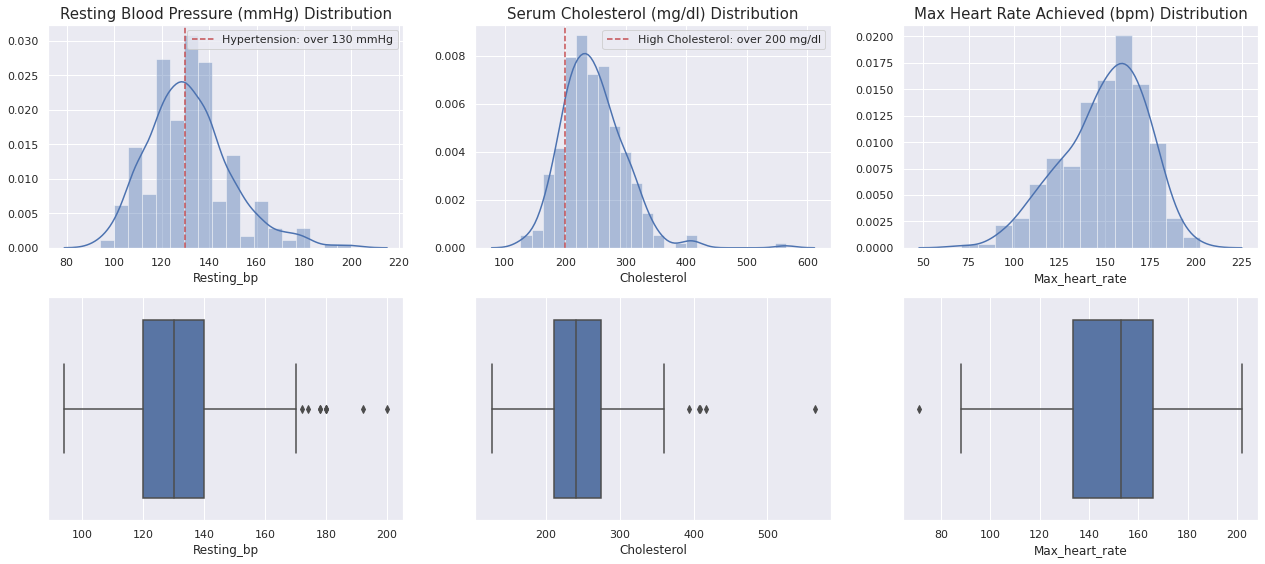

In [13]:
def risk_factors_dist(data):
    """
    Show distributions of risk factors, Resting_bp, Chlesterol, and Max_heart_rate
    """
    fig = plt.figure(figsize=(18, 8))
    
    # Resting blood pressure
    plt.subplot(2, 3, 1)
    sns.distplot(data['Resting_bp'])
    plt.title('Resting Blood Pressure (mmHg) Distribution', fontsize=15)
    plt.axvline(x=130, color='r', linestyle='--', label='Hypertension: over 130 mmHg')
    plt.legend()
    
    plt.subplot(2, 3, 4)
    sns.boxplot(data['Resting_bp'], orient='h')   
        
        
    # Serum cholesterol 
    plt.subplot(2, 3, 2)
    sns.distplot(data['Cholesterol'])
    plt.title('Serum Cholesterol (mg/dl) Distribution', fontsize=15)
    plt.axvline(x=200, color='r', linestyle='--', label='High Cholesterol: over 200 mg/dl')
    plt.legend()
    
    plt.subplot(2, 3, 5)
    sns.boxplot(data['Cholesterol'], orient='h')
  
    
    # Maximum heart rate
    plt.subplot(2, 3, 3)
    sns.distplot(data['Max_heart_rate'])
    plt.title('Max Heart Rate Achieved (bpm) Distribution', fontsize=15)
    
    plt.subplot(2, 3, 6)
    sns.boxplot(data['Max_heart_rate'], orient='h')

    plt.tight_layout()
    plt.show()
    
    
risk_factors_dist(df);

#### **Observations**
* Both ```Resting_bp``` and ```Cholesterol``` are a little bit right-skewed distribution.
* We can wee some outliers from those box plots above. Especially, ```Chelesterol``` has an extreme outlier.
* ```Max_heart_rate``` is a more left-skewed distribution.
* Most of resting blood pressure is distributed around more or less 130 mmHg.
* The mean of Serum cholesterol fall into high cholesterol level.
* In ```Max_heart_rate``` distribution, we can see some population have too low maximum heartrate even though between 150 to 200 bpm is average maximum heart rate for adults.

#### ```Resting_bp```, ```Cholesterol```, and ```Max_heart_rate``` **vs.** ```Sex```

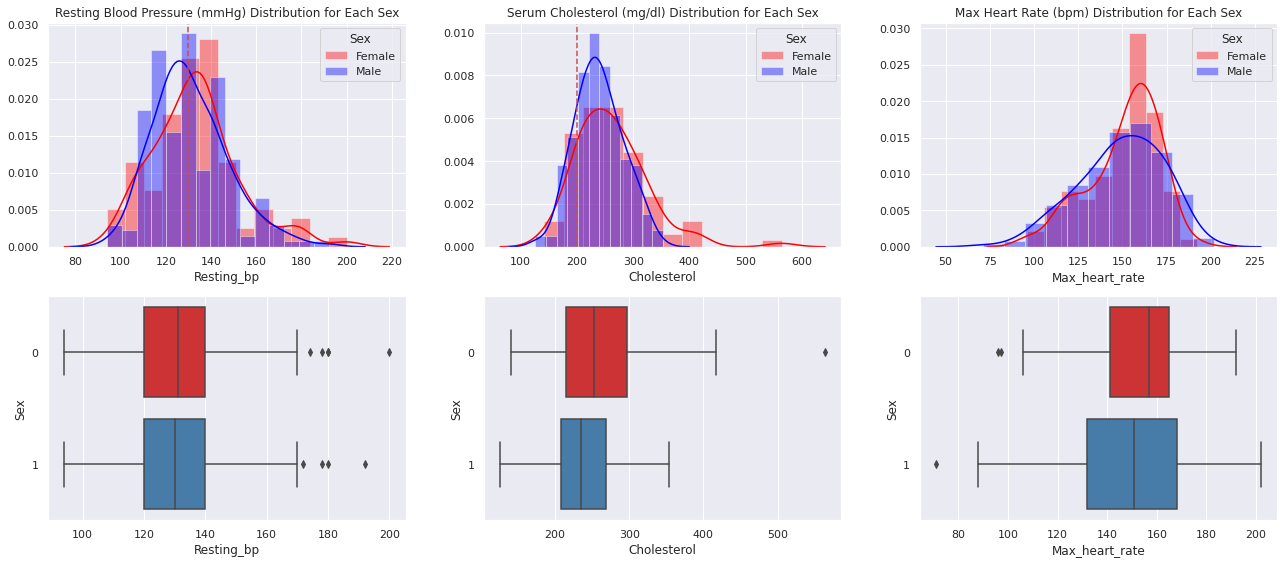

In [14]:
 def risk_factors_dist_sex(data):
    """
    Show distributions of risk factors for each sex
    """
    fig = plt.figure(figsize=(18, 8))
    
    # Resting blood pressure for each sex
    plt.subplot(2, 3, 1)
    trestbps_female = data[data['Sex']==0]['Resting_bp']
    trestbps_male = data[data['Sex']==1]['Resting_bp']
    sns.distplot(trestbps_female, color='Red')   
    sns.distplot(trestbps_male, color='Blue')
    plt.title('Resting Blood Pressure (mmHg) Distribution for Each Sex')
    plt.gca().legend(title='Sex', labels=['Female','Male'])
    plt.axvline(x=130, color='r', linestyle='--', label='Hypertension: over 130 mmHg')
    
    plt.subplot(2, 3, 4)
    sns.boxplot(x=data['Resting_bp'], y=data['Sex'], 
                palette='Set1', orient='h')
    
    
    # Serum cholesterol distribution for each sex
    plt.subplot(2, 3, 2)
    chol_female = data[data['Sex']==0]['Cholesterol']
    chol_male = data[data['Sex']==1]['Cholesterol']
    sns.distplot(chol_female, color='Red')   
    sns.distplot(chol_male, color='Blue')
    plt.title('Serum Cholesterol (mg/dl) Distribution for Each Sex')
    plt.gca().legend(title='Sex', labels=['Female','Male'])
    plt.axvline(x=200, color='r', linestyle='--', label='High Cholesterol: over 200 mg/dl')
    
    plt.subplot(2, 3, 5)
    sns.boxplot(x=data['Cholesterol'], y=data['Sex'], 
                palette='Set1', orient='h')
    
    
    # Max heart rate distribution for each sex 
    plt.subplot(2, 3, 3)
    thalach_female = data[data['Sex']==0]['Max_heart_rate']
    thalach_male = data[data['Sex']==1]['Max_heart_rate']
    sns.distplot(thalach_female, color='Red')   
    sns.distplot(thalach_male, color='Blue')
    plt.title('Max Heart Rate (bpm) Distribution for Each Sex')
    plt.gca().legend(title='Sex', labels=['Female','Male'])
    
    plt.subplot(2, 3, 6)
    sns.boxplot(x=data['Max_heart_rate'], y=data['Sex'], 
                palette='Set1', orient='h')
    
    plt.tight_layout()
    plt.show()
    
    
risk_factors_dist_sex(df);

#### **Observations**
* Most **<font color="Red">Female</font>** is slightly distributed in over 130 mmHg range more than **<font color="MediumBlue">Male</font>**.
* Both **<font color="MediumBlue">Male</font>** and **<font color="Red">Female</font>** cholesterol levels are right-skewed distributions, but **<font color="Red">Female</font>** is more likely to have extreme chlesterol level.
* **<font color="MediumBlue">Male</font>** and **<font color="Red">Female</font>** shows left-skewed distributions and most of the populations fills into between 150 to 200 bpm, which is average maximum heart rate. However, both sex have several outliers which indicates too low maximum heart rate.

#### ```Resting_bp```, ```cholesterol```, ```Max_heart_rate``` **vs.** ```Condition```

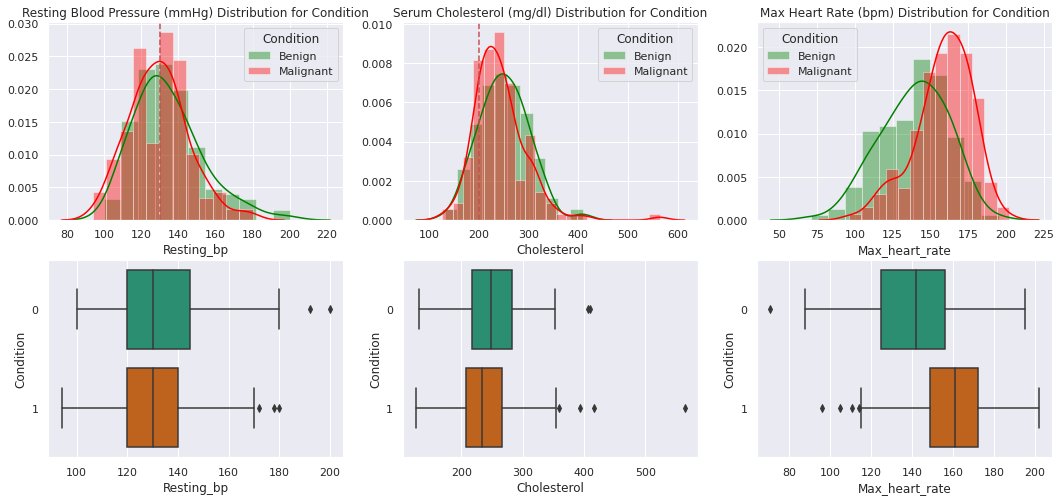

In [15]:
def risk_factors_dist_condition(data):
    """
    Show distributions of risk factors for each condition
    """
    fig = plt.figure(figsize=(18, 8))
    
    # Resting blood pressure distribution for each condition
    plt.subplot(2, 3, 1)
    trestbps_b = data[data['Condition']==0]['Resting_bp']
    trestbps_m = data[data['Condition']==1]['Resting_bp']
    sns.distplot(trestbps_b, color='Green')   
    sns.distplot(trestbps_m, color='Red')
    plt.title('Resting Blood Pressure (mmHg) Distribution for Condition')
    plt.gca().legend(title='Condition', labels=['Benign','Malignant'])  
    plt.axvline(x=130, color='r', linestyle='--', label='Hypertension: over 130 mmHg')
    
    plt.subplot(2, 3, 4)
    sns.boxplot(x=data['Resting_bp'], y=data['Condition'], 
                orient='h', palette='Dark2')
    
    
    # Serum cholesterol distribution for each condition
    plt.subplot(2, 3, 2)
    chol_b = data[data['Condition']==0]['Cholesterol']
    chol_m = data[data['Condition']==1]['Cholesterol']
    sns.distplot(chol_b, color='Green')
    sns.distplot(chol_m, color='Red')
    plt.title('Serum Cholesterol (mg/dl) Distribution for Condition')
    plt.gca().legend(title='Condition', labels=['Benign','Malignant'])
    plt.axvline(x=200, color='r', linestyle='--', label='High Cholesterol: over 200 mg/dl')

    plt.subplot(2, 3, 5)
    sns.boxplot(x=data['Cholesterol'], y=data['Condition'],
                orient='h', palette='Dark2')
    
    
    # Max heart rate achieved distribution for each condition
    plt.subplot(2, 3, 3)
    thalach_b = data[data['Condition']==0]['Max_heart_rate']
    thalach_m = data[data['Condition']==1]['Max_heart_rate']
    sns.distplot(thalach_b, color='Green')
    sns.distplot(thalach_m, color='Red')
    plt.title('Max Heart Rate (bpm) Distribution for Condition')
    plt.gca().legend(title='Condition', labels=['Benign','Malignant'])
    
    plt.subplot(2, 3, 6)
    sns.boxplot(x=data['Max_heart_rate'], y=data['Condition'],
                orient='h', palette='Dark2')
    
    
risk_factors_dist_condition(df);

#### **Observations**  
* Both **<font color="Green">Benign</font>** and **<font color="Coral">Malignant</font>** are mainly distributed around 130 mmHg. It does not seem that **<font color="Coral">Malignant</font>** condition tends to have more high resting blood pressure because **<font color="Green">Benign</font>** condition has high resting blood pressure more than **<font color="Coral">Malignant</font>**.
* Even though most **<font color="Green">Benign</font>** and **<font color="Coral">Malignant</font>** show over healthly cholesterol range, **<font color="Coral">Malignant</font>** condition is more likely to have high serum cholesterol levels.

### 4-4. Symptoms of Heart Disease  
In this dataset, ```Chest_pain_type``` and ```Exercise_induced_angina``` contributes to symptoms of heart disease. ```Chest_pain_type``` reveals what kind of chest pain type the subjects have and```Exercise_induced_angina``` indicates the presence of angina caused by physical activity.  

[*Angina*](https://www.heart.org/en/health-topics/heart-attack/angina-chest-pain#:~:text=Angina%20is%20chest%20pain%20or,neck%2C%20jaw%2C%20or%20back.) is a type of chest pain caused by lacking of enoguh oxgen in blood flow to the heart. It may make you feel pressure or squeezing in your chest. This chest pain itself is not a disease, but it is a symptom of heart failure, called *coronary heart disease (CHD)*.  

#### **<font color="Coral">Symptoms 1.</font>** ```Chest_pain_type```  
[*Chest pain*](https://www.heart.org/en/health-topics/heart-attack/angina-chest-pain) is a major symptom of cardiovascular disease.
Some people have a heart attack without chest pain, but they may have had experience of chest pain, the form of cardiovascular disease.  
Here is the values of ```Chest_pain_type``` below:  
* 0 = *Typical angina*:  
Typical angina is also known as [*stable angina*](https://www.healthline.com/health/stable-angina), most common type of angina. This is caused by physical activity or emotional stress.  
 
* 1 = *Atypical angina*:  
Atypical angina is also known as [*unstable angina*](https://www.healthline.com/health/unstable-angina). This chest pain occurs suddenly and gets worse over time. It is caused by a plaque in blood vessels.

* 2 = *Non-agina pain*:  
This type of chest pain is not caused by heart disease or hart attack. In most cases, [*non-angina pain*](https://my.clevelandclinic.org/health/diseases/15851-gerd-non-cardiac-chest-pain) associates with the problem of the esophagus.

* 3 = *Asymptomatic*:  
This silent heart attack is known as [*silent myocardial infarction (SMI)*](https://www.health.harvard.edu/heart-health/the-danger-of-silent-heart-attacks). This is not like classic chest pain. *SMI* is mild pain and does not alway happens on the left side of the chest. People who have this type of chest pain usually do not realize thier condition, but this is a very dangerous symptom of heart disease.

#### **<font color="Coral">Symptoms 2.</font>** ```Exercise_induced_angina```  
*Exercise induced angina* is a type of angina. When you use stairs, walk or exercise, your heart needs more blood flow. It makes your heart lack of oxigen and then causes chest pain. This is typically called [*stable angina*](https://www.healthline.com/health/stable-angina#:~:text=Angina%20is%20a%20type%20of,most%20common%20type%20of%20angina.).

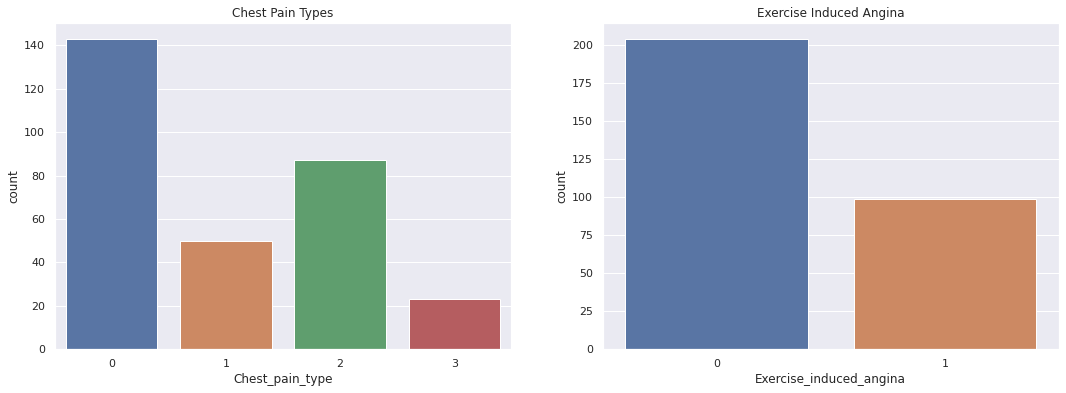

In [16]:
def symptoms_features(data):
    """
    Count the number of Chest_pain_type and Exercise_induced_angina values.
    """
    plt.figure(figsize=(18, 6))
    
    # Chest pain types
    plt.subplot(1, 2, 1)
    sns.countplot(x='Chest_pain_type', data=data)
    plt.title('Chest Pain Types')

    
    # Exercise induced angina
    plt.subplot(1, 2, 2)
    sns.countplot(x='Exercise_induced_angina', data=data)
    plt.title('Exercise Induced Angina')

    
symptoms_features(df);

#### **Observations**  
```Chest_pain_type```  
* The majority of chest pain type is *Typical angina* (= 0).
* *Asymptomatic* (= 3) is the lowest number, but we have to pay attention to how this value correlates to ```Condition```.  

```Exercise_induced_angina```  
* The number of having exercise induced angina (= 1) is the half of not having it (= 0).
* The feature value of *Having Exercise induced angina* (= 1) in ```Exercise_induced_angina``` can be included as *Typical angina* (= 0) in ```Chest_pain_type``` because *Typical angina* is the as we mensioned the types of angina above.  

#### ```Chest_pain_type``` and ```Exercise_induced_angine``` *vs.* ```Sex```

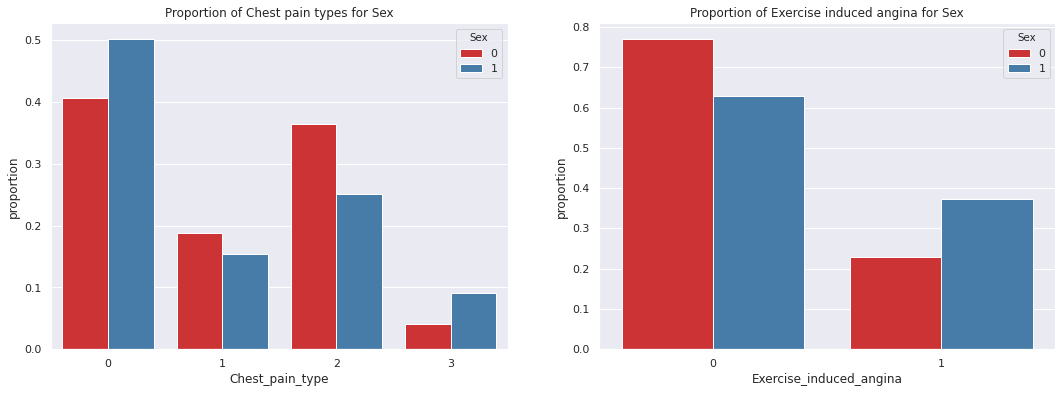

In [17]:
def symptoms_features_sex(data):
    """
    Plot bar charts of chest pain type and exercise induced angina for Sex.
    """
    fig = plt.figure(figsize=(18, 6))
    
    # Chest pain types for Sex 
    plt.subplot(1, 2, 1)
    data['Chest_pain_type'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Chest_pain_type', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of Chest pain types for Sex')
    
    
    # Exercise induced angina for Sex
    plt.subplot(1, 2, 2)
    data['Exercise_induced_angina'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Exercise_induced_angina', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of Exercise induced angina for Sex')
    plt.show()
    
    
symptoms_features_sex(df);

#### **Observations**  
```Chest_pain_type```  
* In **<font color="Red">Female</font>** population, the proportion of *Typical angina* (= 0), about 40%, and *Non-angina pain* (= 2), about 35%, are the majorities. 
* **<font color="Red">Female</font>** is more likely to feel *Atypical angina* (= 1) and *Non-angina pain* (= 2) more than **<font color="MediumBlue">Male</font>**.
* The half of **<font color="MediumBlue">Male</font>** population has *Typical angina* (= 0).
* The proportion of *Asymptomatic* (= 3) is the smallest for both sex, but **<font color="MediumBlue">Male</font>** is double proportion of **<font color="Red">Female</font>**.

```Exercise_induced_angina```  
* **<font color="MediumBlue">Male</font>** is more likely to feel exercise induced angina than **<font color="Red">Female</font>**. 

#### ```Chest_pain_type``` and ```Exercise_induced_angine``` *vs.* ```Condition```

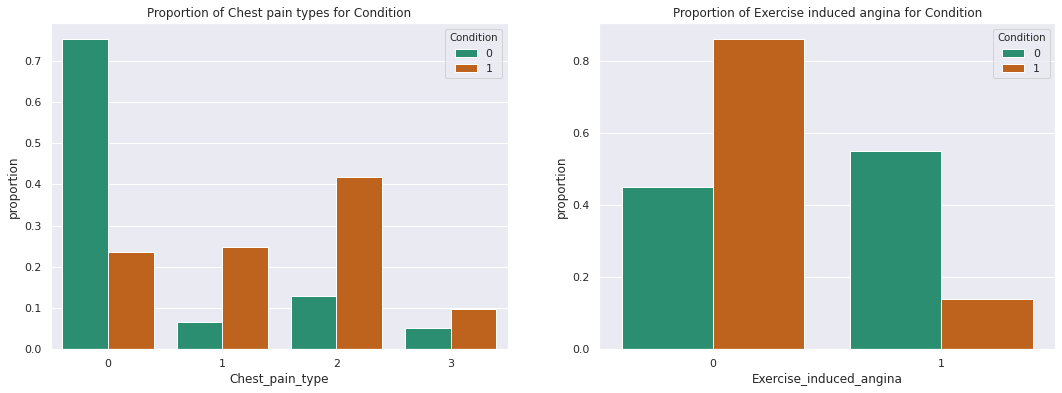

In [18]:
def symptoms_features_condition(data):
    """
    Plot bar charts of chest pain type and exercise induced angina for Condition.
    """
    fig = plt.figure(figsize=(18, 6))
    
    plt.subplot(1, 2, 1)
    data['Chest_pain_type'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Chest_pain_type', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Proportion of Chest pain types for Condition')
    
    plt.subplot(1, 2, 2)
    data['Exercise_induced_angina'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Exercise_induced_angina', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Proportion of Exercise induced angina for Condition')
    plt.show()
    
    
symptoms_features_condition(df);

#### **Observations**  
```Chest_pain_type```  
* Surprisingly, *Non-angina pain* (= 2), not caused by heart disease or heart attack, is strongly related to **<font color="Coral">Malignant</font>** tumors. The proportion is almost three times of **<font color="Green">Benign</font>**.
* The chest pain types except *Typical angina* strongly associate with **<font color="Coral">Malignant</font>** condition.

```Exercise_induced_angina```  
* The result of ```Exercise_induced_angina``` indicates that *Having exercise induced angina* (= 1) does not always correlate with **<font color="Coral">Malignant</font>** condition.

## 4-5. Heart Functions for Heart Disease  
To check up the heart functions, there are several tests such as *electrocardiography (ECG)*, *fluoroscopy* and *thallium stress test*. We will explore how the heart functions are related to heart disease.  

#### **<font color="Coral">Heart Functions 1.</font>** ```Resting_ecg```: Resting electrocardiographic results  
[Electrocardiography (ECG)](https://www.mayoclinic.org/tests-procedures/ekg/about/pac-20384983) is a test to assess the heart rate and rhythm. This test can detect heart disease, heart attack, enlarged heart and abnormal heart rhythm.  
   * 0 = Normal
   * 1 = Abnormal ST-T wave
   * 2 = Showing probable or definite *left ventricular hypertrophy*
        * **What is *the left ventricular hypertrophy (LVH)*?**
          * [Left Ventricular Hypertrophy (LVH)](https://www.heart.org/en/health-topics/heart-valve-problems-and-disease/heart-valve-problems-and-causes/what-is-left-ventricular-hypertrophy-lvh#:~:text=Left%20ventricular%20hypertrophy%2C%20or%20LVH,pressure%20overwork%20the%20heart%20muscle.) is enlargement and thckening of the walls of your heart, left ventricle. This causes overwork of the heart muscle.  
        
           

![ECG](https://upload.wikimedia.org/wikipedia/commons/5/53/SinusRhythmLabels.png)

#### **<font color="Coral">Heart Functions 2.</font>** ```ST_slope```: The slope of the peak exercise ST segment  
   * 0 = Upsloping
   * 1 = Horizontal 
   * 2 = Downsloping
   
![ST-segment Depression](https://litfl.com/wp-content/uploads/2018/10/ST-segment-depression-upsloping-downsloping-horizontal.png) 

Horizontal and downsloping ST depression is more than 0.5 mm indicates myocardial ischemia, blackaged blood stream to the heart muscle in a coronary artery.  

On the other hand, upsloping ST depression is typically shown by physical activity ([Resource](https://ecgwaves.com/st-segment-normal-abnormal-depression-elevation-causes/)).

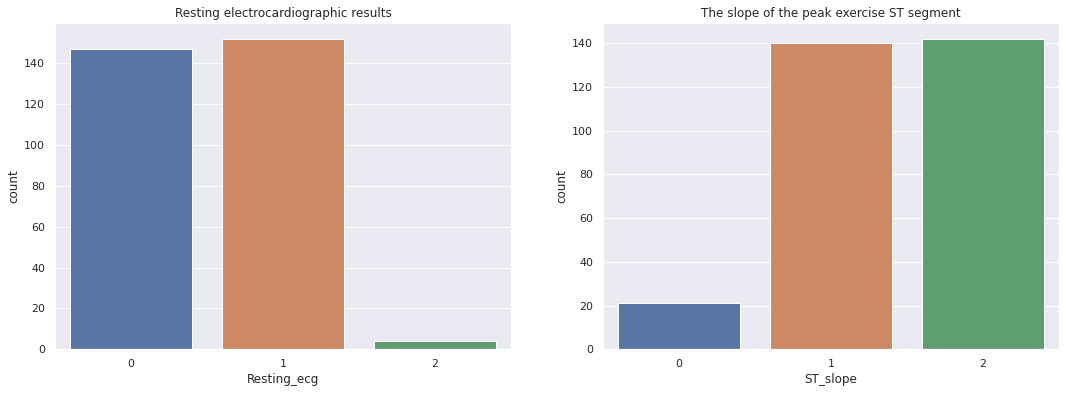

In [19]:
def heart_functions(data):
    """
    Make a bar chart of Resting_ecg and ST_slope.
    """
    plt.figure(figsize=(18, 6))

    # Resting_ecg
    plt.subplot(1, 2, 1)
    sns.countplot(x='Resting_ecg', data=data)
    plt.title('Resting electrocardiographic results')

    # ST_slope
    plt.subplot(1, 2, 2)
    sns.countplot(x='ST_slope', data=data)
    plt.title('The slope of the peak exercise ST segment')
    plt.show()
    

heart_functions(df);

#### **Observations**  
```Resting_ecg```  
* Showing probable or definite left ventricular hypertrophy (= 2) rarely shows, but the half of the subjects has abnormal ST-T wave (= 1).
```ST_slope```  
*  Most ST_slope values show abnormalities, holizontal (= 1) , 140, and downsloping (= 2), over 140.

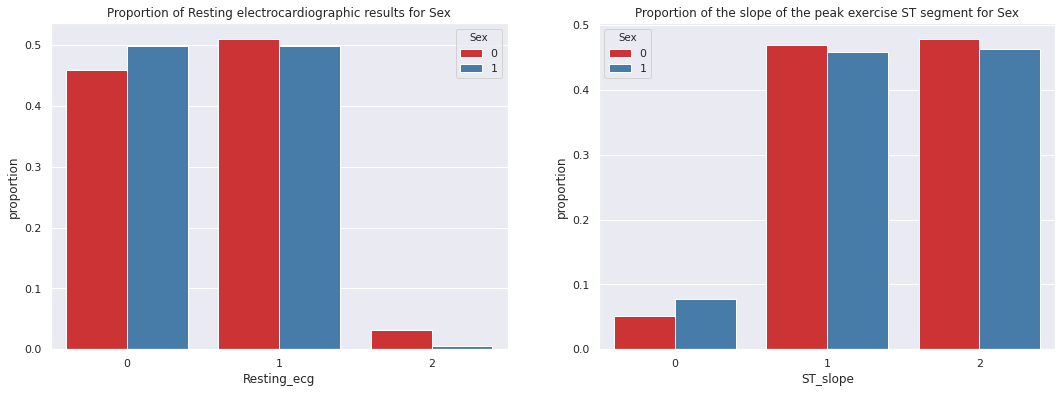

In [20]:
def heart_functions_sex(data):
    """
    Plot the proportion of Resting_exc and ST_slope for Sex.
    """
    plt.figure(figsize=(18, 6))

    # Resting_ecg
    plt.subplot(1, 2, 1)
    data['Resting_ecg'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Resting_ecg', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of Resting electrocardiographic results for Sex')

    # ST_slope
    plt.subplot(1, 2, 2)
    data['ST_slope'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='ST_slope', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of the slope of the peak exercise ST segment for Sex')
    plt.show()
    

heart_functions_sex(df);

#### **Observations**  
```Resting_ecg```  
* Abnormal ST-T wave (= 1), over 50%, and showing probable or definite left ventricular hypertrophy (= 2) in **<font color="Red">Female</font>** are the slightly larger than **<font color="MediumBlue">Male</font>**.  

```ST_slope```  
* In both holizontal abnormal (=1) and downsloping abnormality (= 2), **<font color="Red">Female</font>** has more abnormalities than **<font color="MediumBlue">Male</font>**. 

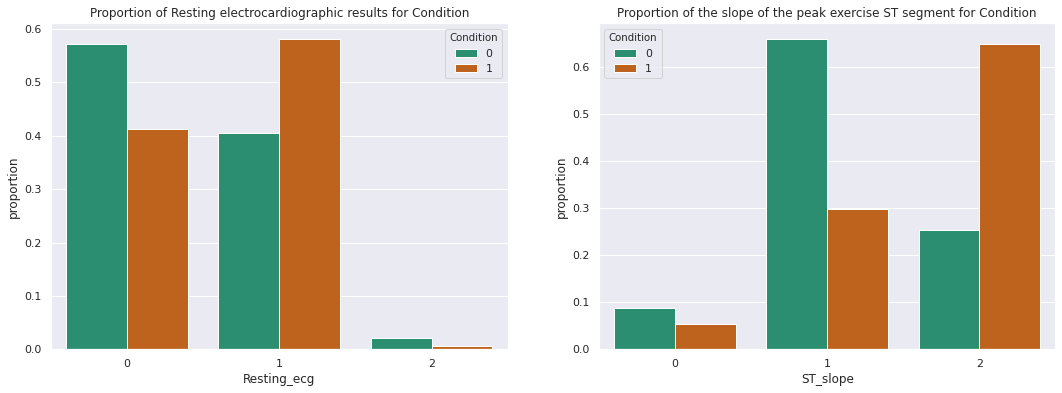

In [21]:
def heart_functions_condition(data):
    """
    Plot the proportion of Resting_exc and ST_slope for Condition.
    """
    plt.figure(figsize=(18, 6))

    # Resting_ecg
    plt.subplot(1, 2, 1)
    data['Resting_ecg'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Resting_ecg', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Proportion of Resting electrocardiographic results for Condition')

    
    # ST_slope
    plt.subplot(1, 2, 2)
    data['ST_slope'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='ST_slope', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Proportion of the slope of the peak exercise ST segment for Condition')
    plt.show()
    

heart_functions_condition(df);

#### **Observations**  
```Resting_ecg```  
* Normal ST-T wave (= 0) proportion is over 50%, but it contributes to **<font color="Coral">Malignant</font>**. It seems that people who have normal ST-T wave still have the risk of heart disease.  
* Abnormal ST-T wave (= 1) clearly associates with **<font color="Coral">Malignant</font>** condition, about 58%.  

```ST_depression```  
* Downsloping (= 2) abiously shows that it contributes to **<font color="Coral">Malignant</font>**, but the other horizontal (= 1), over 60%, is more likely to be shown as **<font color="Green">Benign</font>** even though it is a type of abnormal ST-segment depressions.  

#### **<font color="Coral">Heart Functions 3.</font>** ```ST_depression```: ST-segment depression induced by exercise relative to rest  
[Normal ST-segment depression](https://en.my-ekg.com/how-read-ekg/st-segment.html) is flat or up to 0.5 mm.  

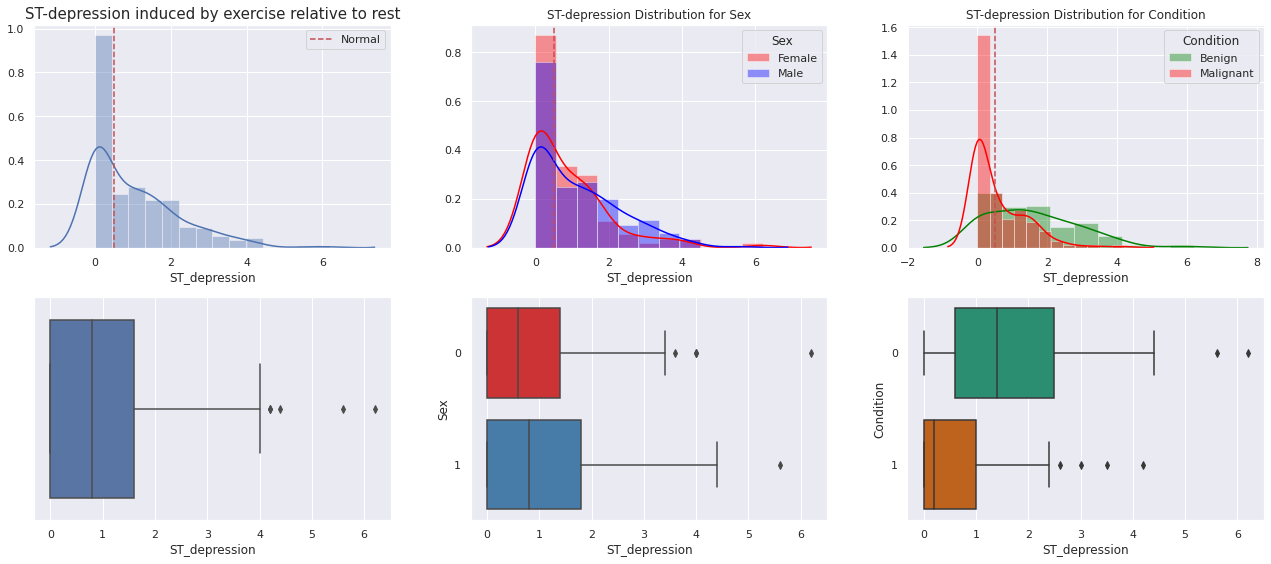

In [22]:
def heart_functions_sex(data):
    """
    Make a standard distribution of ST_depression and distributions for Sex and Condition.
    """    
    fig = plt.figure(figsize=(18, 8))

    # ST-depression induced by exercise relative to rest
    plt.subplot(2, 3, 1)
    sns.distplot(data['ST_depression'])
    plt.title('ST-depression induced by exercise relative to rest', fontsize=15)
    plt.axvline(x=0.5, color='r', linestyle='--', label='Normal')
    plt.legend()
    
    plt.subplot(2, 3, 4)
    sns.boxplot(data['ST_depression'], orient='h') 
     
    
    # ST-depression for Sex
    plt.subplot(2, 3, 2)
    chol_female = data[data['Sex']==0]['ST_depression']
    chol_male = data[data['Sex']==1]['ST_depression']
    sns.distplot(chol_female, color='Red')   
    sns.distplot(chol_male, color='Blue')
    plt.title('ST-depression Distribution for Sex')
    plt.gca().legend(title='Sex', labels=['Female','Male'])
    plt.axvline(x=0.5, color='r', linestyle='--', label='Normal')
    
    plt.subplot(2, 3, 5)
    sns.boxplot(x=data['ST_depression'], y=data['Sex'], 
                palette='Set1', orient='h')
        
        
    # ST-depression for Condition
    plt.subplot(2, 3, 3)
    thalach_b = data[data['Condition']==0]['ST_depression']
    thalach_m = data[data['Condition']==1]['ST_depression']
    sns.distplot(thalach_b, color='Green')
    sns.distplot(thalach_m, color='Red')
    plt.title('ST-depression Distribution for Condition')
    plt.gca().legend(title='Condition', labels=['Benign','Malignant'])
    plt.axvline(x=0.5, color='r', linestyle='--', label='Normal')
    
    plt.subplot(2, 3, 6)
    sns.boxplot(x=data['ST_depression'], y=data['Condition'], 
                palette='Dark2', orient='h')
    
    plt.tight_layout()
    plt.show()
    
    
heart_functions_sex(df);    

#### **Observations**  
* ```ST_depression``` shows right-skewed distribution. The majority of the value is less than value 1.  
* The distribution of **<font color="Red">Female</font>** and **<font color="MediumBlue">Male</font>** are as same as total distribution.  
* **<font color="Green">Benign</font>** is widely distributed. However, **<font color="Coral">Malignant</font>** is a tightly right-skewed distribution and has several outliers. Normal ST-segment depression is flat or up to 0.5 mm, but the ST_depression value for Condition does not clearly affect **<font color="Coral">Malignant</font>**.  

#### **<font color="Coral">Heart Functions 4.</font>** ```Num_major_vessels```: Number of major vessels (0-3) colored by fluoroscopy  
[Fluoroscopy](https://www.urmc.rochester.edu/encyclopedia/content.aspx?contenttypeid=92&contentid=P07662) is an imaging tool to study the body such as skeletal, digestive, urinay, resporatory, and retroductive systems. Fluoroscopy helps to diagnose or treat certain parts of the body, including bones, muscles, and heart vessels.  
In this dataset, Fluoscopy is used to help to see the blood flow through the coronary arteries.

#### **<font color="Coral">Heart Functions 5.</font>** ```Thallium_test```: Thallium scintigraphy  
   * 3 = Normal  
   * 6 = Fixed defect  
   * 7 = Reversible defect  

Here is a problem about this feature, ```Thallium_test```. The feature value from Data Description has three variables like above. but actual coded results in ```Thallium_test``` have four values such as value 0, 1, 2, and 3.  

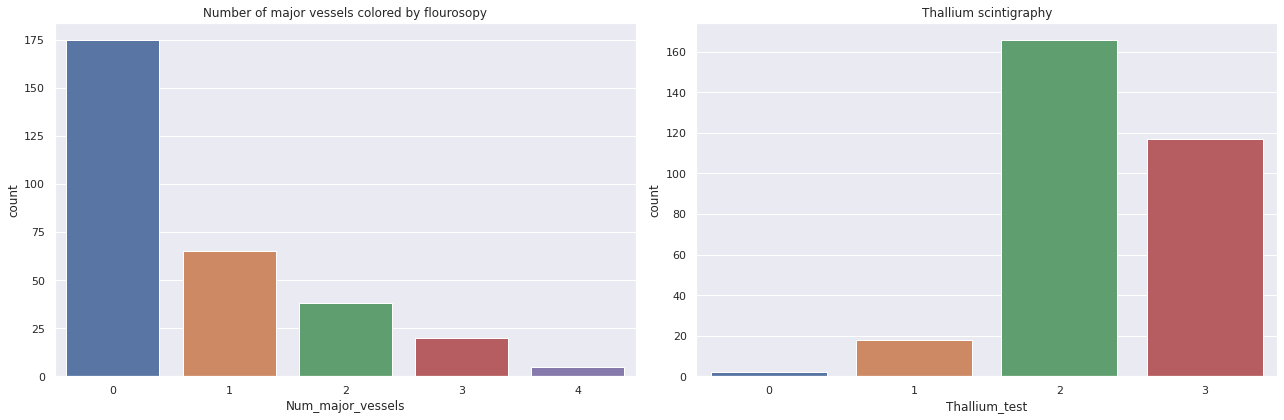

In [23]:
def heart_functions2(data):
    """
    EDA with numeric variables
    """
    fig = plt.figure(figsize=(18, 6))
    
    # Num_major_vessels
    plt.subplot(1, 2, 1)
    sns.countplot(x='Num_major_vessels', data=data)
    plt.title('Number of major vessels colored by flourosopy')
    
    # Thallium
    plt.subplot(1, 2, 2)
    sns.countplot(x='Thallium_test', data=data)
    plt.title('Thallium scintigraphy')
    
    plt.tight_layout()
    plt.show()
    
    
heart_functions2(df);

#### **Observations**  
```Num_major_vessels```  
* The majority of the subjects do not have any colored clot in blood vessels, but the other half of the people have at leat one clot.  

#### ```Num_major_vessels``` and ```Thallium_test``` vs. ```Sex```

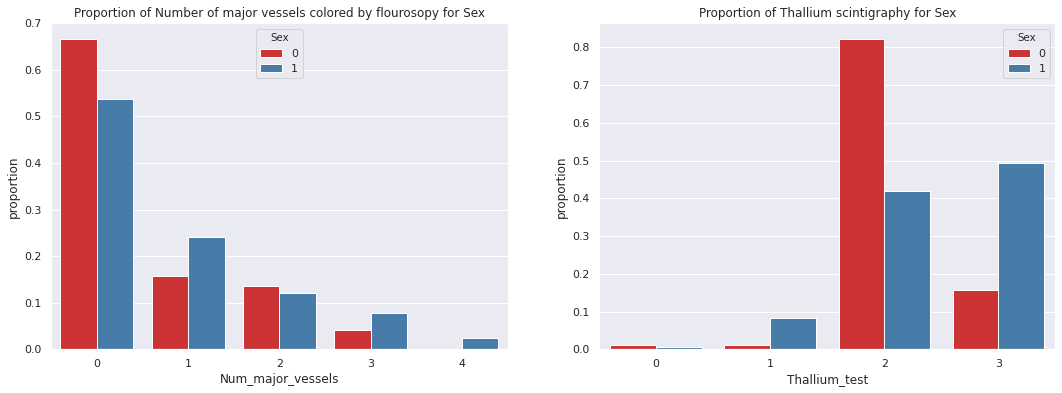

In [24]:
def heart_functions2_sex(data):
    """
    Plot proportions of Num_major_vessels and Thallium_test for Sex.
    """
    plt.figure(figsize=(18, 6))

    # Num_major_vessels
    plt.subplot(1, 2, 1)
    data['Num_major_vessels'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Num_major_vessels', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of Number of major vessels colored by flourosopy for Sex')

    # Thallium test
    plt.subplot(1, 2, 2)
    data['Thallium_test'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Thallium_test', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of Thallium scintigraphy for Sex')
    plt.show()
    

heart_functions2_sex(df);

#### **Observations**  
```Num_major_vessels```  
* **<font color="MediumBlue">Male</font>** tesnds to have several clots in blood vessels more than **<font color="Red">Female</font>**.  

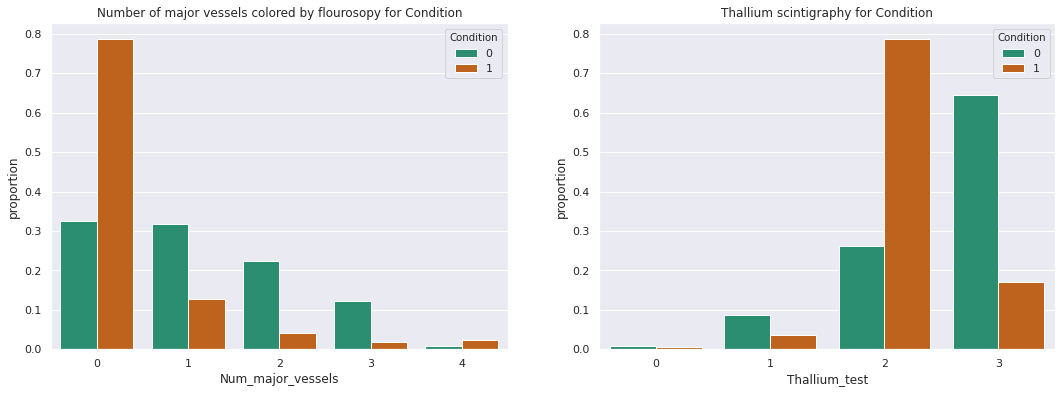

In [25]:
def heart_functions2_condition(data):
    """
    Plot proportions of Num_major_vessels and Thallium_test for Condition.
    """
    plt.figure(figsize=(18, 6))

    # Num_major_vessels
    plt.subplot(1, 2, 1)
    data['Num_major_vessels'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Num_major_vessels', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Number of major vessels colored by flourosopy for Condition')

    # ST_slope
    plt.subplot(1, 2, 2)
    data['Thallium_test'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Thallium_test', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Thallium scintigraphy for Condition')
    plt.show()
    

heart_functions2_condition(df);

#### **Observations**  
```Num_major_vessels```  
* Even though the subjects do not have any clot in major vessels, they are strongly exposed to have **<font color="Coral">Malignant</font>** condition.  

### 4-6. Feature Variable - ```Age```

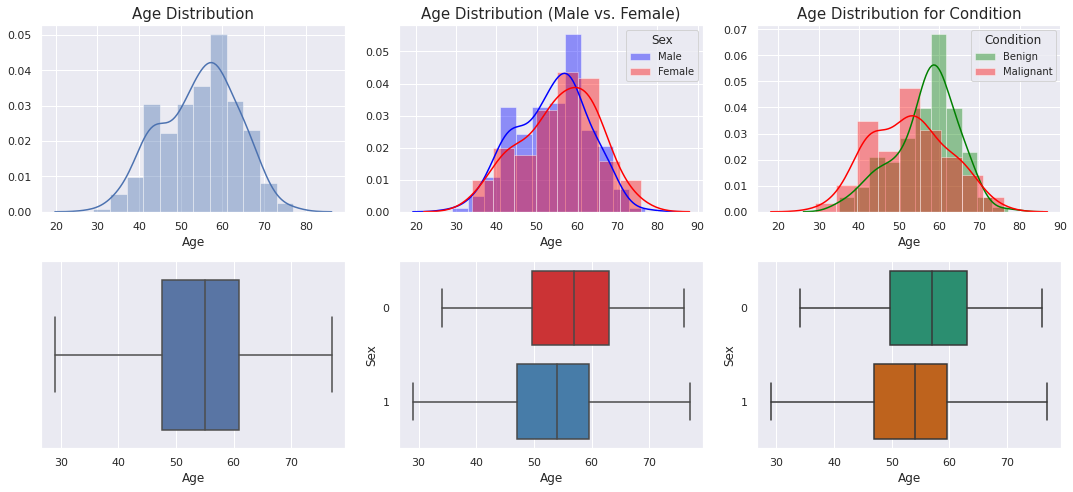

In [26]:
def age_distribution(data):
    """
    Make a standard distribution and distributions for Sex
    """
    fig = plt.figure(figsize=(15, 7))

    # Age distribution
    plt.subplot(2, 3, 1)
    sns.distplot(data['Age']) 
    plt.title('Age Distribution', fontsize=15)

    plt.subplot(2, 3, 4)
    sns.boxplot(data['Age'], orient='h')
    

    # Age distribution for sex
    plt.subplot(2, 3, 2)
    female = df[df['Sex']==0]['Age']
    male = df[df['Sex']==1]['Age']
    sns.distplot(male, color='Blue', label='Male')
    sns.distplot(female, color='Red', label='Female')
    plt.title('Age Distribution (Male vs. Female)', fontsize=15)
    plt.legend(title='Sex', fontsize=10)

    plt.subplot(2, 3, 5)
    sns.boxplot(x=data['Age'], y=data['Sex'], orient='h', palette='Set1')
    
    
    # Age distribution for Condition
    plt.subplot(2, 3, 3)
    benign = df[df['Condition']==0]['Age']
    malignant = df[df['Condition']==1]['Age']

    sns.distplot(benign, color='Green', label='Benign')
    sns.distplot(malignant, color='Red', label='Malignant')
    plt.title('Age Distribution for Condition', fontsize=15)
    plt.legend(title='Condition', fontsize=10)
    
    plt.subplot(2, 3, 6)
    sns.boxplot(x=data['Age'], y=data['Sex'], orient='h', palette='Dark2')
    
    plt.tight_layout()
    plt.show()

    
age_distribution(df)

#### **Observations**  
* Under age 50 is more likely to have **<font color="Coral">Malignant</font>** than the older.

### 4-7. ```Age``` vs. Multiple Features for ```Condition```

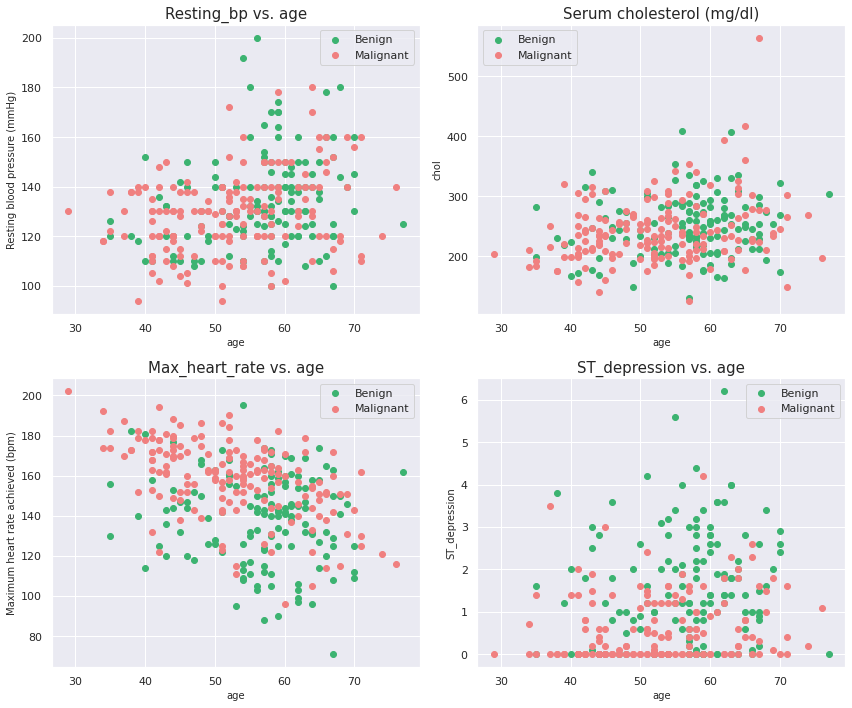

In [27]:
def numeric_features_vs_age(data): 
    """
    Effects of features for heart disease by age
    """
    benign = data.Condition==0
    malignant = data.Condition==1
    
    age_benign = data.Age[benign]
    age_malignant = data.Age[malignant]
    
    b_color = 'MediumSeaGreen'
    m_color = 'LightCoral'
    
    fig = plt.figure(figsize=(12, 10))
    
    # Resting blood pressure (mmHg) 
    plt.subplot(2, 2, 1)
    plt.scatter(x=age_benign, y=data.Resting_bp[benign], color=b_color)
    plt.scatter(x=age_malignant, y=data.Resting_bp[malignant], color=m_color)
    plt.title('Resting_bp vs. age', fontsize=15)
    plt.legend(['Benign', 'Malignant'])
    plt.xlabel('age', fontsize=10)
    plt.ylabel('Resting blood pressure (mmHg)', fontsize=10)
        
        
    # Serum Cholesterol (mg/dl) 
    plt.subplot(2, 2, 2)
    plt.scatter(x=age_benign, y=data.Cholesterol[benign], color=b_color)
    plt.scatter(x=age_malignant, y=data.Cholesterol[malignant], color=m_color)
    plt.title('Serum cholesterol (mg/dl)', fontsize=15)
    plt.legend(['Benign', 'Malignant'])
    plt.xlabel('age', fontsize=10)
    plt.ylabel('chol', fontsize=10)
 

    # Maximum heart rate achieved (bpm)
    plt.subplot(2, 2, 3)
    plt.scatter(x=age_benign, y=data.Max_heart_rate[benign], color=b_color)
    plt.scatter(x=age_malignant, y=data.Max_heart_rate[malignant], color=m_color)
    plt.title('Max_heart_rate vs. age', fontsize=15)
    plt.legend(['Benign', 'Malignant'])
    plt.xlabel('age',fontsize=10)
    plt.ylabel('Maximum heart rate achieved (bpm)', fontsize=10)

    
    # ST_depression
    plt.subplot(2, 2, 4)
    plt.scatter(x=age_benign, y=data.ST_depression[benign], color=b_color)
    plt.scatter(x=age_malignant, y=data.ST_depression[malignant], color=m_color)
    plt.title('ST_depression vs. age', fontsize=15)
    plt.legend(['Benign', 'Malignant'])
    plt.xlabel('age',fontsize=10)
    plt.ylabel('ST_depression', fontsize=10)   
            
    plt.tight_layout()
    plt.show()


numeric_features_vs_age(df);

#### **Observations**  
```Resing_bp```  
* People over 50 years has more wide range of blood pressure, but it seems that there is no relationship between resting blood pressure and age for condition.  

```Cholesterol```  
* The higher cholesterol level the middle age population has, the more **<font color="Coral">Malignant</font>** condition they have.  

```Max_heart_rate```  
* The younger population is more likely to have high maximum heart rate and **<font color="Coral">Malignant</font>** condition. However, the older age tends to have low maximum heart rate and they have **<font color="Green">Benign</font>** tumors.  

```ST_depression```  
* In any age, people who have the shallow ST-segment depression are exposed to **<font color="Coral">Malignant</font>**.  

### 4-8. Feature vs. Feature for ```Condition```

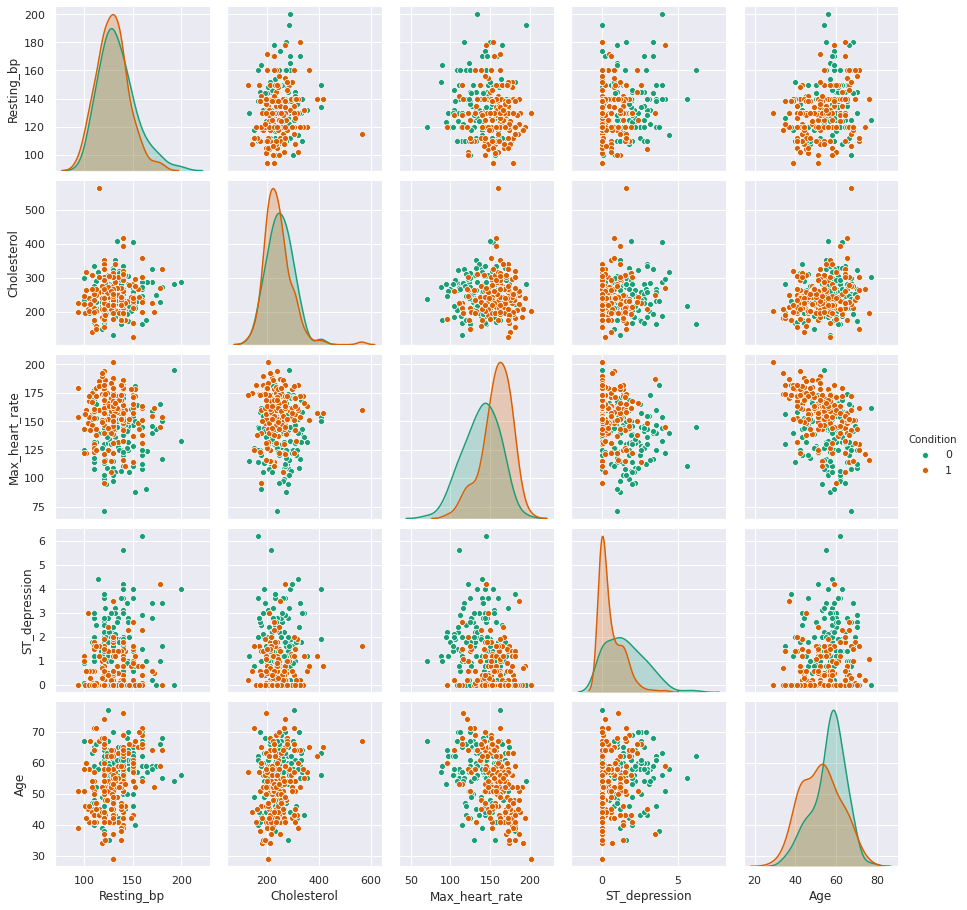

In [28]:
sns.pairplot(df[['Resting_bp','Cholesterol','Max_heart_rate','ST_depression','Age', 'Condition']],hue='Condition', palette='Dark2');

#### **Observations**  
* ```Chlesterol``` and ```Age``` expresses a positive correlation for both **<font color="Coral">Malignant</font>** and **<font color="Green">Benign</font>**.  

* ```Max_heart_rate``` and ```Age``` shows a negative correlation for **<font color="Coral">Malignant</font>** and **<font color="Green">Benign</font>**.  

### 4-9. Correlations

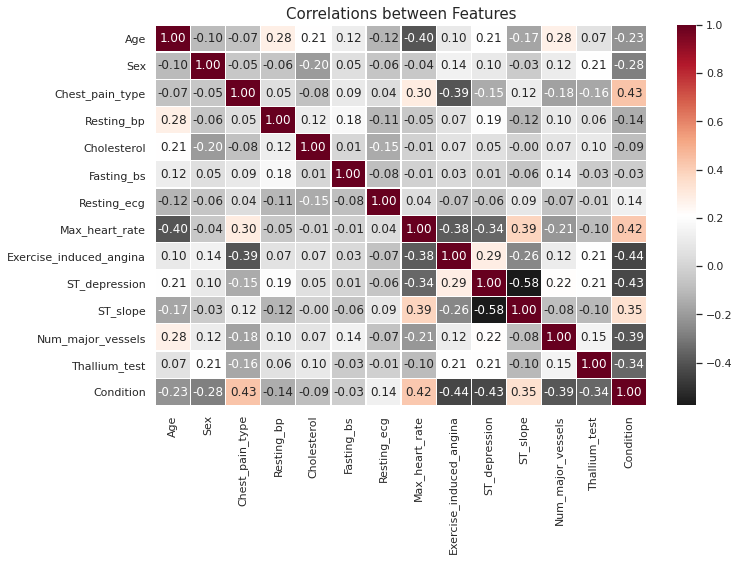

In [29]:
def correlation_heatmap(data):
    """
    Correlation Heat Map of the features.
    """
    plt.figure(figsize=(11, 7))
    sns.heatmap(data.corr(), annot=True, linewidth=0.2, 
                fmt='.2f', cmap='RdGy_r')
    plt.title('Correlations between Features', fontsize=15)
    plt.show()
    
    
correlation_heatmap(df);

#### **Observations**  
* Top correlated variables for ```Condition``` following:  
    * ```Chest_pain_type```: 0.43  
    * ```Max_heart_rate```: 0.42  
    * ```ST_slope```: 0.35  


# <font color="MediumBlue">Thanks for reading ! : )</font>  
Please check [my classification work](https://www.kaggle.com/microvision/heart-disease-classification) below as well!  
If you have any advice, please leave your comment.  
I appriciate your comment, upvote, and advice!  